# Activity 3 - Andromeda Galaxy Properties

In this activity, we will measure the properties of our neighbor, the Andromeda galaxy!

**Step 0:** To start, run the following cell to import the packages we'll use:

In [15]:
# always start by importing useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from scipy import ndimage, misc
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
%matplotlib inline

## Part 1 - Photometry

We are going to measure the total luminosity of Andromeda from a B-band image taken as part of the DSS2 survey.  Upload the "andromeda.fits" file to Colab so we can use it. (This may take a few minutes).


### Step 1 - Read in data

In astronomy, telescope images are saved as Flexible Image Transport System (FITS) files instead of JPG's or PNG's. We will read our image into python using the astropy FITS package (astropy.io.fits), which loads our image as a 2D numpy array.

Run this cell to read in our image & print out the number of pixels in the image.  

In [72]:
# Andromeda image

# read in the image
image = fits.getdata('andromeda.fits', ext=0)

# output information [# rows, # cols]
print(' Number of pixels = ', image.shape)


 Number of pixels =  (4000, 7000)


This means that our image array has 4000 rows of pixels and 7055 columns of pixels.  This saves the flux at each X & Y pixel value.

Run the cell below to plot our image using the matplotlib "imshow" function.

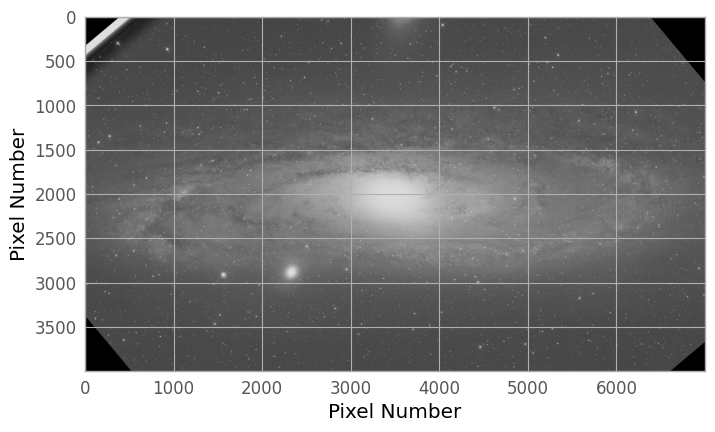

In [73]:
# plot our image!
plt.figure()
plt.imshow(image, cmap='gray')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Number')
plt.show()


### Step 2 - Trim image

First, let's only consider the pixels **along the major axis** of the galaxy. We need to trim down our image to just the central rows.

The cell below will keep only the rows around a center value, then plot the brightness as a function of radius from the galaxy's center.

- Modify the cell below to choose a central row number ("central_row")
- Test 3 different values to see how the brightness profile changes


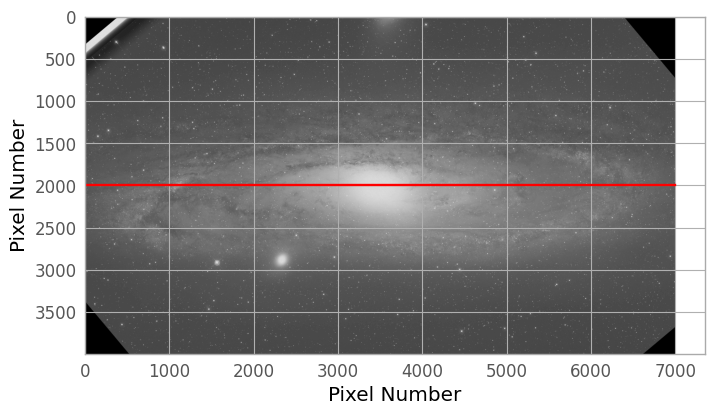

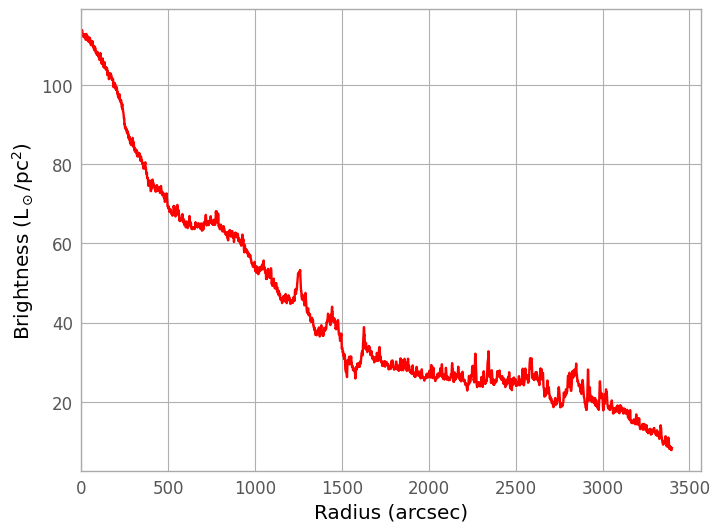

In [74]:
# choose a center row
central_row = 2000

# replot image
plt.figure()
plt.imshow(image, cmap='gray')
plt.plot([0,7000], [central_row, central_row], color='red')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Number')
plt.show()



# Find the brightness along the chosen row
#   & save the brightness profile as a new variable
flux = np.mean(image[central_row-100:central_row+100, 3600:], axis=0)
pixel_scale  = 1   # 1 pixel corresponds to 1 arcsec on the sky
radius = np.arange(len(flux))*pixel_scale # radius in arcsec

# brightness profile
plt.plot(radius, flux, color='red')
plt.xlabel('Radius (arcsec)')
plt.ylabel('Brightness (L$_\odot$/pc$^2$)')
plt.xlim(0)
plt.show()



Notes: The angular radius values are saved in the "radius" array, and the brightness profile across the image is saved in the "flux"  array.  Also, the flux values have been modified so that our brightness profile has units of L$_\odot$/pc$^2$, to make our analysis easier.

### Step 3 - Measuring brightness profile

Now we can measure the brightness profile for Andromeda and determine the scale length of the disk.  

Remember that the disk has an exponential surface luminosity profile:
$$I(R) = I_0 e^{-R/h}$$

The cell below creates a model exponential profile based on a chosen central brightness ("I0") and scale length ("h").

Run this cell a few times to test different values and find the ones that best match our observed profile. (It won't be a perfect match, so don't worry if it's not quite right!)

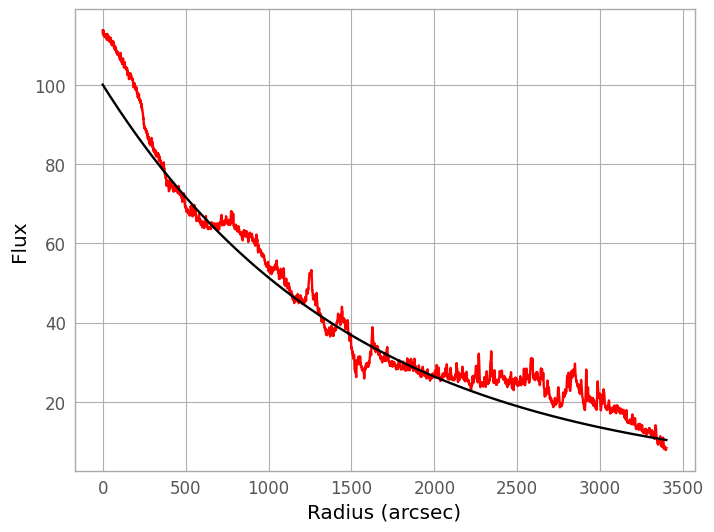

In [75]:
# model surface brightness
I0 = 100   # central surface luminosity  in Lsun/pc2
h = 1500      # scale length in arcsec
model = I0 * np.exp(-radius/h)


# brightness profile
plt.plot(radius, flux, color='red')
plt.plot(radius, model, color='black')
plt.xlabel('Radius (arcsec)')
plt.ylabel('Flux')
plt.show()


Now that we've found the scale length in arcseconds, we need to convert it to parsecs. Write this calculation in the cell below, assuming a distance of 780 kpc to Andromeda. (Remember that there are 206265" per radian.)

In [76]:
# convert scale length from arcsec to parsecs
h_rad = h / 206265    # radians

h_pc = h_rad * 780 * 1000  # pc
print(h_pc)

5672.314740746127


### Step 4 - Disk Luminosity

Calculate the total luminosity of the disk in the cell below, using $$L = 2\pi I_0 h^2$$ with the scale length in parsecs!

In [77]:
# total disk luminosity
L = 2 * np.pi * I0 * h_pc**2

print('Total luminosity = ', L/1e9, ' billion Lsun')


Total luminosity =  20.216245812426966  billion Lsun


### Question

- What's the total luminosity of the disk (in billions of solar luminosities)?  

\


- The Milky Way's disk is about 30 billion L$_\odot$ -- how does Andromeda compare?

\



## Part 2 - Rotation Curve

[Carignan et al. 2006](https://iopscience.iop.org/article/10.1086/503869) measured a rotation curve for Andromeda using radio observations of hydrogen 21cm emission.

The file "rotation_curve.csv" contains the following information:
- R = angular distance from the center of Andromeda (in arcseconds)
- Vrot = rotational velocity (in km/s) -- already corrected for inclination!
- Error = uncertainty in the rotational velocity (in km/s)



### Step 5 - Read in data

As usual, we need to read in our data table in order to use it.

Modify the cell below to:
- read in the data file using the astropy.ascii.read() function (or whatever function you prefer!)
- print out the table to make sure it looks ok
- pull out each column into it's own variable
- convert the arrays to numpy arrays (so we can do math with them later)

In [78]:
# read in file
table = ascii.read('rotation_curve.csv', format='csv')
print(table)

# pull out columns into new numpy arrays
r = np.array(table['R'])        # radius from center in arcmin
vrot = np.array(table['Vrot'])  # rotational velocity in km/s
error = np.array(table['Error'])  # uncertainty



  R    Vrot Error
----- ----- -----
 20.0 150.0  10.5
 25.0 235.5  17.8
 30.0 242.9   0.8
 35.0 251.1   0.7
 40.0 262.0   2.1
 45.0 258.9   6.9
 50.0 255.1   5.7
 55.0 251.8  17.1
 60.0 252.1   7.4
 65.0 251.0  18.6
  ...   ...   ...
108.0 227.5  28.8
112.5 227.4  28.8
117.0 225.6  28.8
121.5 224.4  28.8
126.0 222.3  28.8
130.5 222.1  28.8
135.0 224.9  28.8
139.5 228.1  28.8
144.0 231.1  28.8
148.5 230.4  28.8
153.0 226.8  28.8
Length = 29 rows


### Step 6 -- Calculate radius from the center

Before we plot our rotation curve, we need to convert the angular radius (in arcmin) to physical radius (in kpc). Assume a distance of 780 kpc from Andromeda to the Earth.



In [79]:
# convert from angular to physical radius
# r = d theta
d = 780 # kpc
theta = r * 60 / 206265    # arcmin --> arcseconds --> radians
r = d * theta # kpc

### Step 7 - Plot rotation curve

Modify the cell below to plot the rotation curve for Andromeda.
- Use any plot colors and symbols you like!
- Change the y axis range to go from 0 to 300.
- Add appropriate axis labels & units


If you want to plot the error bars, use the plt.errorbar() function:
> plt.errorbar(x, y, yerror)

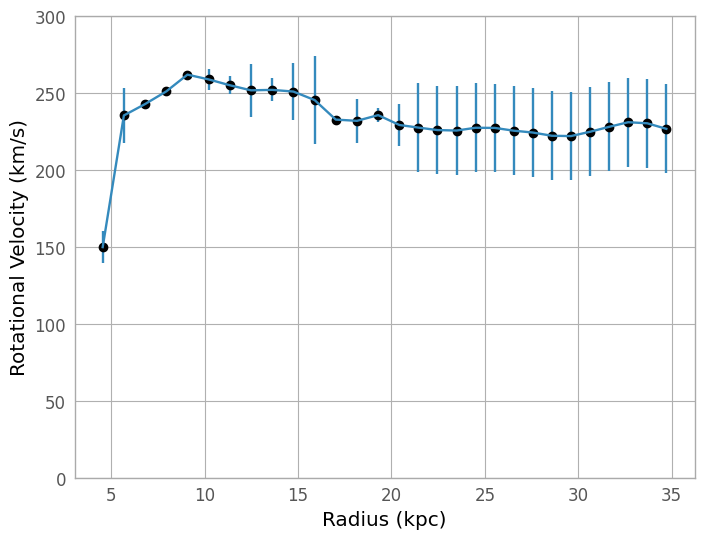

In [80]:
# plot rotatio curve here
plt.errorbar(r, vrot, error)
plt.plot(r, vrot, 'ko')
plt.ylim(0, 300)
plt.xlabel('Radius (kpc)')
plt.ylabel('Rotational Velocity (km/s)')
plt.show()

### Step 8 - Total galaxy mass

Now that we've plotted our rotation curve, we can estimate the maximum rotational velocity for the outer region of Andromeda.  

Either by looking at your plot or printing the values of the array,
- what is the maximum radius measured by our data (in kpc)?
- what is the rotational velocity at this radius (in km/s)?  

Save these numbers as new variables in the cell below.



In [81]:
# maximum radius
rmax = r[-1]        # kpc

# maximum rotational velocity
vmax =  vrot[-1]    # km/s
print(vmax)



226.8


Next, calculate the total mass of Andromeda using:
$$ M = \frac{V_{max}^2 ~R_{max}}{G}$$

Hint -- If you measure distances in parsecs, masses in solar masses, and velocities in kilometers per second, then $G = 4.43 \times 10^{-3}~ \rm{km^2~pc~ s^{-2} M_\odot^{-1}}$.

In [82]:
# total mass
G = 4.43e-3
M = vmax**2 * (rmax * 1000) / G
print(M / 1e9, ' billion Msun')

403.0826610336405  billion Msun


### Question

- What is the mass of Andromeda (in billions of M$_\odot$)?

\

- The mass of the Milky Way is about 500 billion M$_\odot$. Is Andromeda less massive or more massive than the Milky Way?

\



## Part 3 - Dark Matter

Now that we have the total luminosity and total mass of the galaxy, let's see how much is dark matter.

### Step 9 - Luminous mass
Estimate the M/L ratio for Andromeda using the graph below, assuming Andromeda is an Sc galaxy.

Then, calculate the total luminous mass in the galaxy (in M$_\odot$) from the M/L and disk luminosity.

![picture](https://drive.google.com/uc?export=view&id=1YZsD7Cc_WE6DOgJSMOT42MvSPzB30Yvx)

In [83]:
# calculate total luminous mass
MLratio = 5  # Msun / Lsun
mass_lumin = MLratio * L

print(' Luminous mass = ', mass_lumin/1e9, '  billion Msun')


 Luminous mass =  101.08122906213482   billion Msun


### Step 10 - Dark matter mass
Calculate the total mass in dark matter (in M$_\odot$).


In [84]:
# calculate total dark matter mass
mass_dark = M - mass_lumin

print(' Dark matter mass = ', mass_dark/1e9, '  billion Msun')


 Dark matter mass =  302.00143197150567   billion Msun


### Question

- How many times more dark matter does Andromeda have than luminous matter?

\

- Some models predict the dark matter mass is closer to 1 trillion M$_\odot$. Why do you think we measured a lower value?

\


---

## Final instructions
Finish any remaining exercises, then **send me your notebook** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive. Remember to answer any questions!

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!